In [ ]:
# ============================================================================
# CELL 1: Import Modules
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import analysis_functions
import data_loader

importlib.reload(analysis_functions)
importlib.reload(data_loader)

from data_loader import load_oecd_data
from analysis_functions import (
    calculate_lfp_gap,
    calculate_skill_composition,
    plot_migration_trends,
    plot_lfp_comparison,
    plot_lfp_gap_trends,
    plot_highskill_comparison,
    create_summary_table
)


In [2]:
# ============================================================================
# CELL 2: Load ALL Country Data
# ============================================================================

print("Loading data for ALL OECD countries...")
data = load_oecd_data(countries=None, verbose=True)

# Extract dataframes
lfp_data = data['labor_force_participation']
education_data = data['education_distribution']
migration_inflows = data['migration_inflows']
all_countries = data['all_countries']

print(f"\n✓ Data loaded successfully!")
print(f"Available countries: {len(all_countries)}")

Loading data for ALL OECD countries...
LOADING OECD MIGRATION DATA FROM CSV FILES

Loading educational_attainment...
  OK Loaded: 552 rows, 50 columns
  OK Countries: 35

Loading international_migration...
  OK Loaded: 824 rows, 30 columns
  OK Countries: 38

Loading labor_market...
  OK Loaded: 1,590 rows, 30 columns
  OK Countries: 38

Loading permanent_inflows...
  OK Loaded: 1,882 rows, 24 columns
  OK Countries: 29

Loading temporary_inflows...
  OK Loaded: 2,232 rows, 24 columns
  OK Countries: 34

DATA LOADING COMPLETE
Total unique countries: 42
Countries: AUS, AUT, BEL, BGR, CAN, CHE, CHL, COL, CRI, CZE, DEU, DNK, ESP, EST, EU27_2020...


Processed datasets ready for analysis:
  * labor_force_participation: 1,552 rows, 38 countries
  * education_distribution: 549 rows, 35 countries
  * migration_inflows: 824 rows, 38 countries

✓ Data loaded successfully!
Available countries: 42


In [3]:
# ============================================================================
# CELL 3: Calculate Metrics for ALL Countries
# ============================================================================

print("\nCalculating integration metrics...")

# Calculate LFP gaps
lfp_gaps = calculate_lfp_gap(lfp_data)
print(f"✓ LFP gaps calculated: {len(lfp_gaps)} observations")

# Calculate skill composition
skill_metrics = calculate_skill_composition(education_data)
print(f"✓ Skill composition calculated: {len(skill_metrics)} observations")


Calculating integration metrics...
✓ LFP gaps calculated: 781 observations
✓ Skill composition calculated: 92 observations


In [4]:
# ============================================================================
# CELL 4: Explore Data Availability
# ============================================================================

# Check which countries have LFP data
lfp_countries = lfp_data.groupby('country').agg({
    'year': ['min', 'max', 'count']
}).reset_index()
lfp_countries.columns = ['country', 'first_year', 'last_year', 'n_years']
lfp_countries = lfp_countries.sort_values('n_years', ascending=False)

print("\nCountries with most LFP data:")
print(lfp_countries.head(15))

# Check education data
edu_countries = education_data.groupby('country').agg({
    'year': ['min', 'max', 'count']
}).reset_index()
edu_countries.columns = ['country', 'first_year', 'last_year', 'n_years']

print("\nCountries with education data:")
print(edu_countries.head(10))


Countries with most LFP data:
   country  first_year  last_year  n_years
0      AUS        2000       2024       50
1      AUT        2000       2024       50
2      BEL        2000       2024       50
11     ESP        2000       2024       50
12     EST        2000       2024       50
9      DEU        2000       2024       50
37     USA        2000       2024       50
32     PRT        2000       2024       50
35     SWE        2000       2024       50
10     DNK        2000       2024       50
18     HUN        2000       2024       50
17     GRC        2000       2024       50
15     FRA        2000       2024       50
14     FIN        2000       2024       50
20     ISL        2000       2024       50

Countries with education data:
  country  first_year  last_year  n_years
0     AUS        2017       2023       18
1     AUT        2017       2023       18
2     BEL        2017       2023       18
3     BGR        2016       2023       12
4     CAN        2017       2023       

In [5]:
# ============================================================================
# CELL 5: Select Countries for Analysis
# ============================================================================

# Option 1: Manually select countries
selected_countries = ['AUS', 'ITA']

print(f"\nSelected countries: {selected_countries}")

# Filter data
lfp_filtered = lfp_data[lfp_data['country'].isin(selected_countries)]
edu_filtered = education_data[education_data['country'].isin(selected_countries)]
inflows_filtered = migration_inflows[migration_inflows['country'].isin(selected_countries)]
gaps_filtered = lfp_gaps[lfp_gaps['country'].isin(selected_countries)]
skill_filtered = skill_metrics[skill_metrics['country'].isin(selected_countries)]


Selected countries: ['AUS', 'ITA']


In [6]:
# ============================================================================
# CELL 6: Summary Statistics
# ============================================================================

# Get most recent year with data
recent_year = gaps_filtered['year'].max()
print(f"\nMost recent year with data: {recent_year}")

summary = create_summary_table(gaps_filtered, skill_filtered, selected_countries, year=recent_year)


Most recent year with data: 2024

MIGRATION INTEGRATION SUMMARY - 2024
Countries: AUS, ITA

Labor Force Participation:
--------------------------------------------------------------------------------
population_group  Foreign-born  Native-born  lfp_gap  lfp_ratio
country                                                        
AUS                      80.58        80.56    -0.02       1.00
ITA                      71.07        65.83    -5.24       1.08

  * Gap = Native - Foreign (negative means migrants have higher LFP)
  * Ratio = Foreign / Native (1.0 = parity)




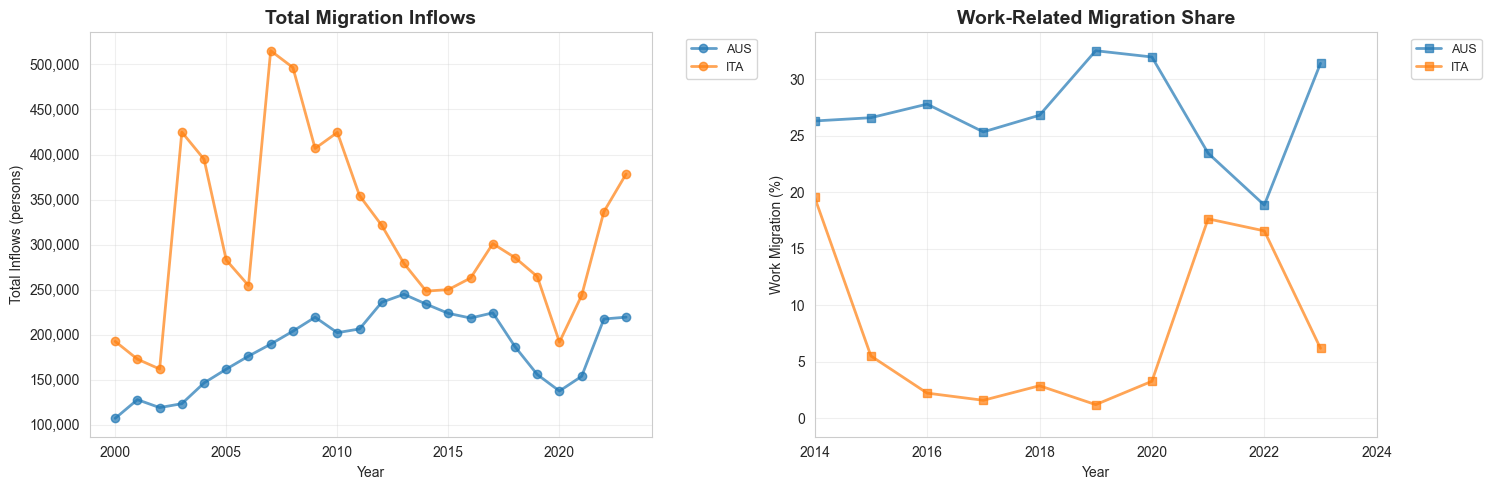

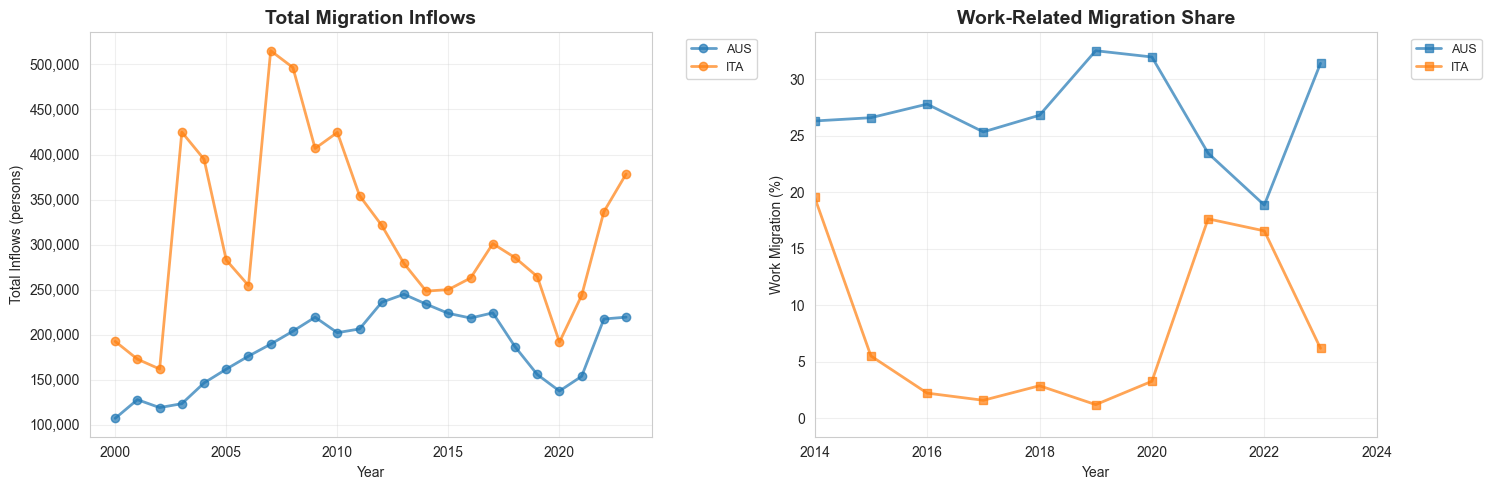

In [7]:
# ============================================================================
# CELL 7: Visualization 1 - Migration Inflow Trends
# ============================================================================

plot_migration_trends(inflows_filtered, countries=selected_countries)

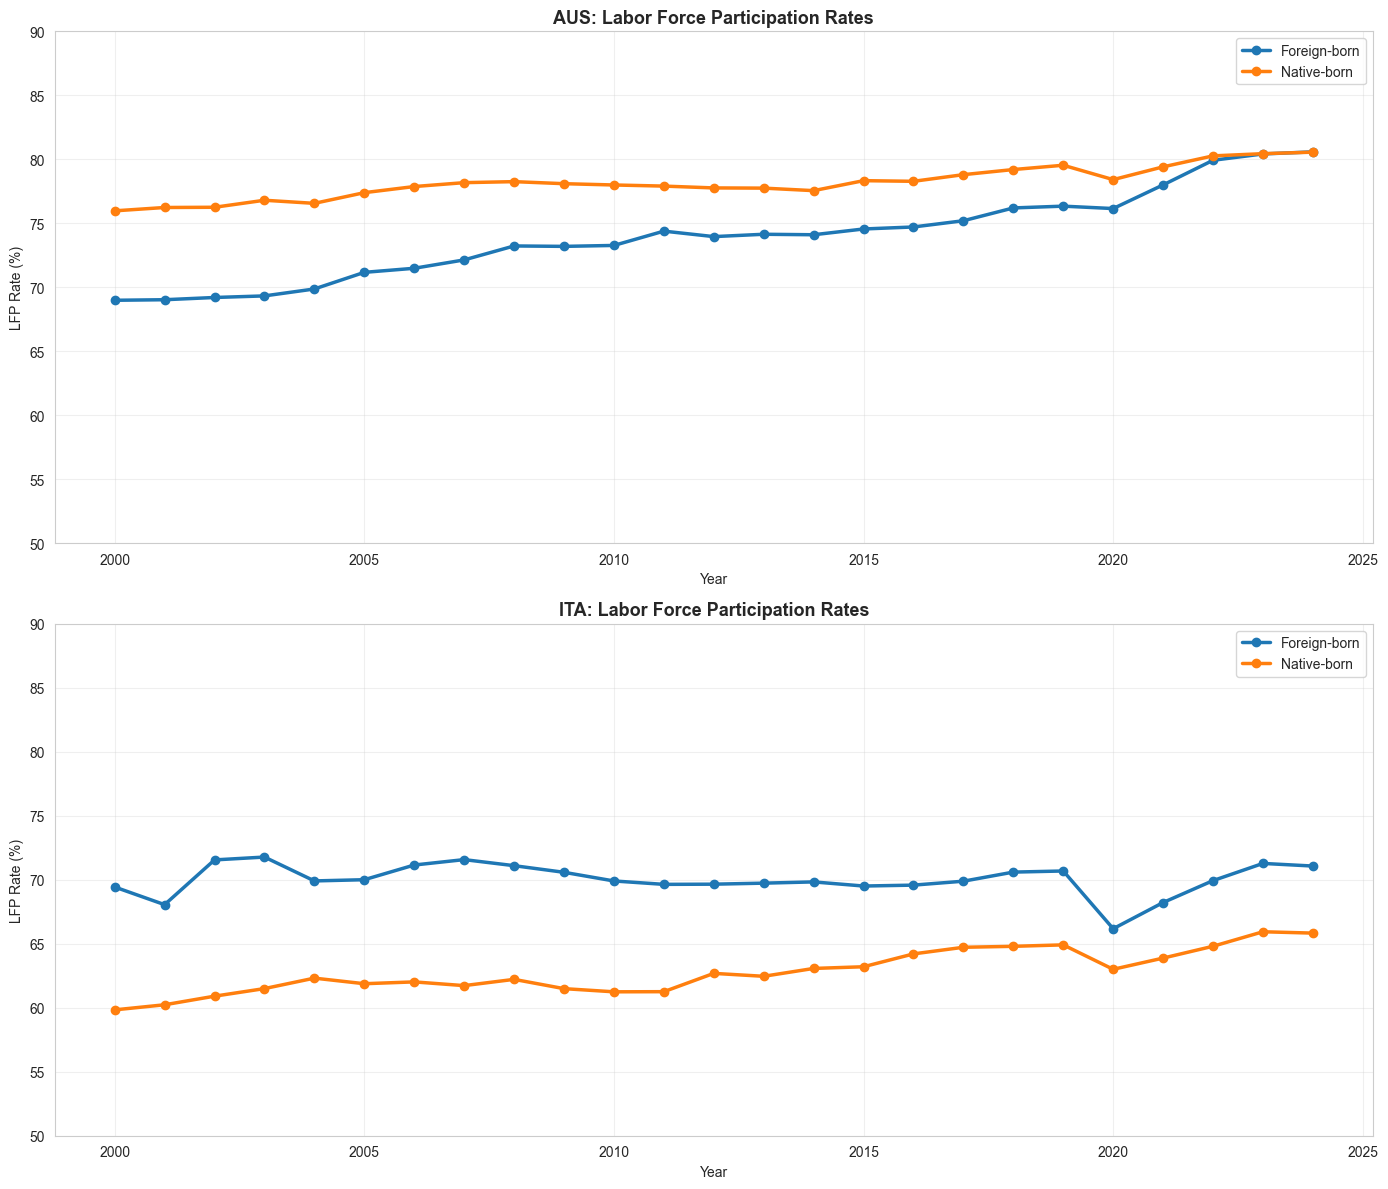

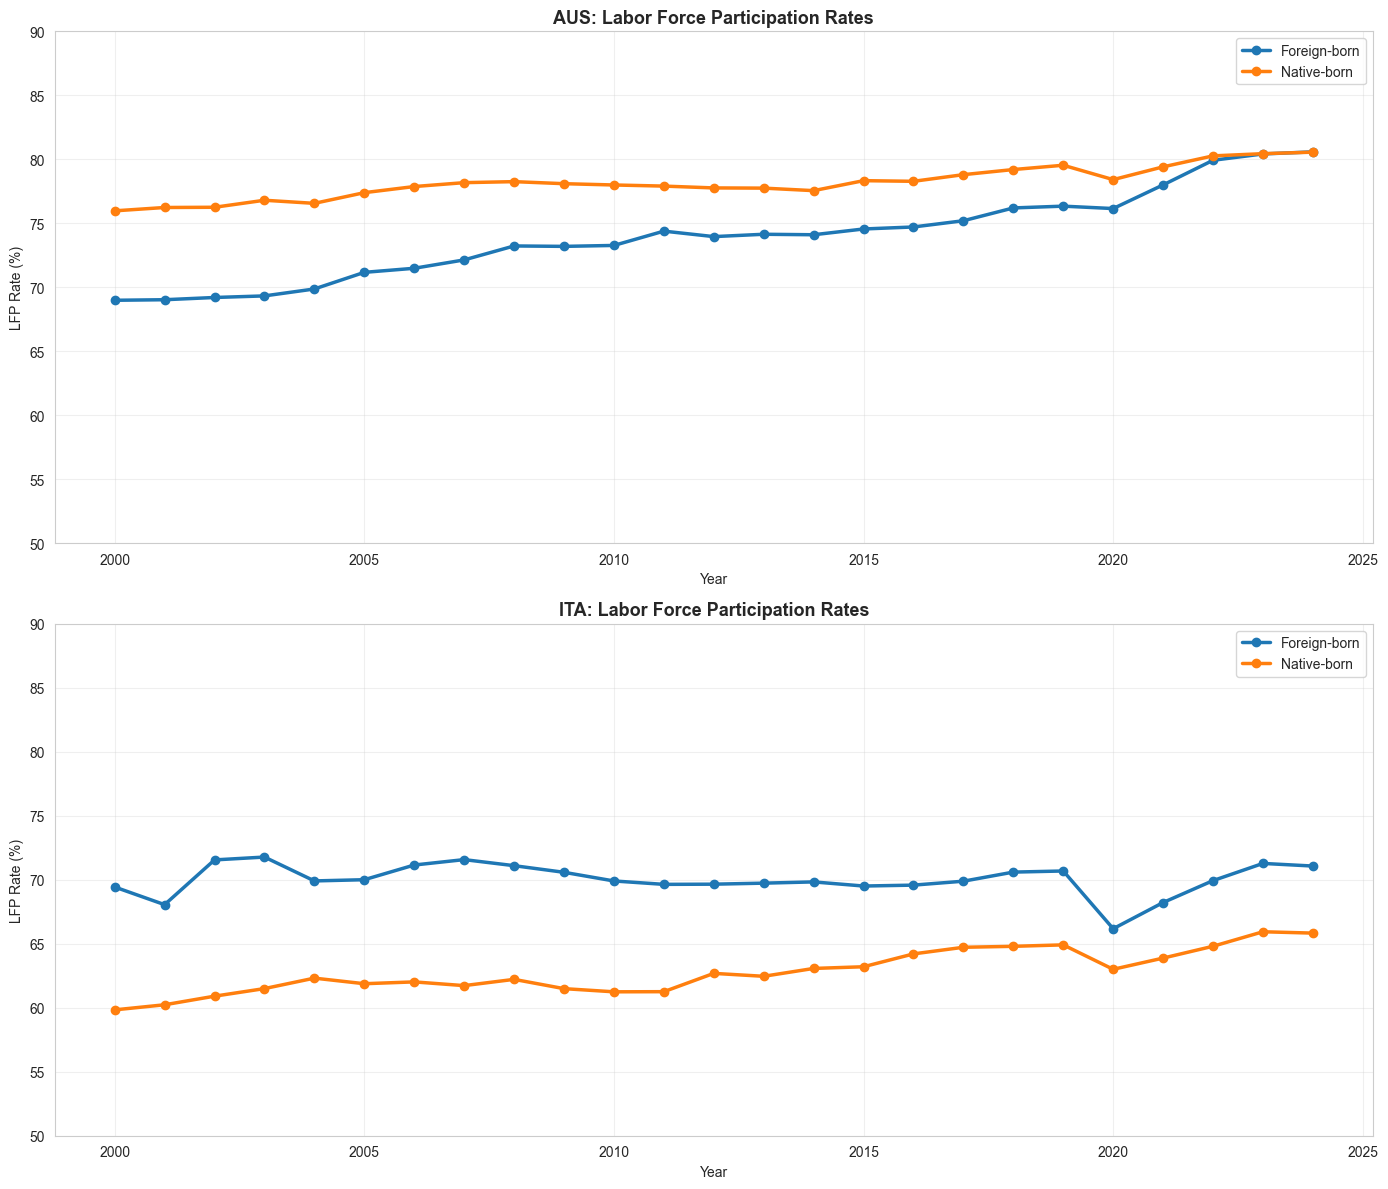

In [8]:
# ============================================================================
# CELL 8: Visualization 2 - Labor Force Participation Comparison
# ============================================================================

plot_lfp_comparison(lfp_filtered, countries=selected_countries[:4])  # Show first 4 countries


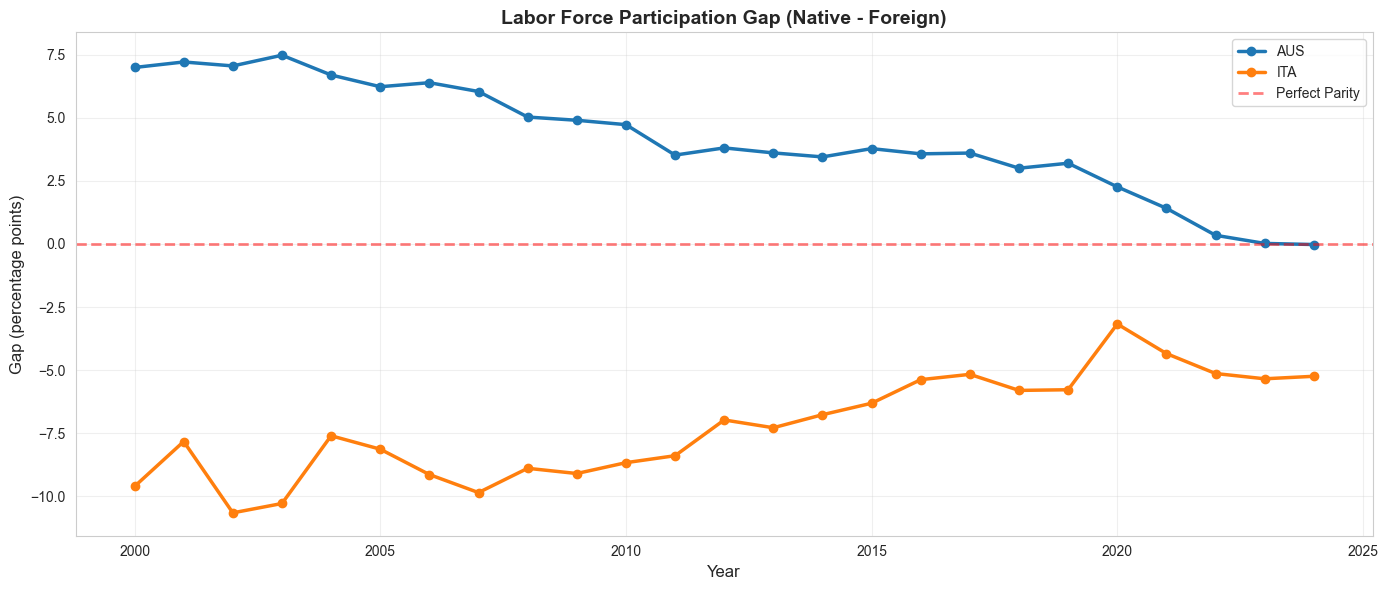

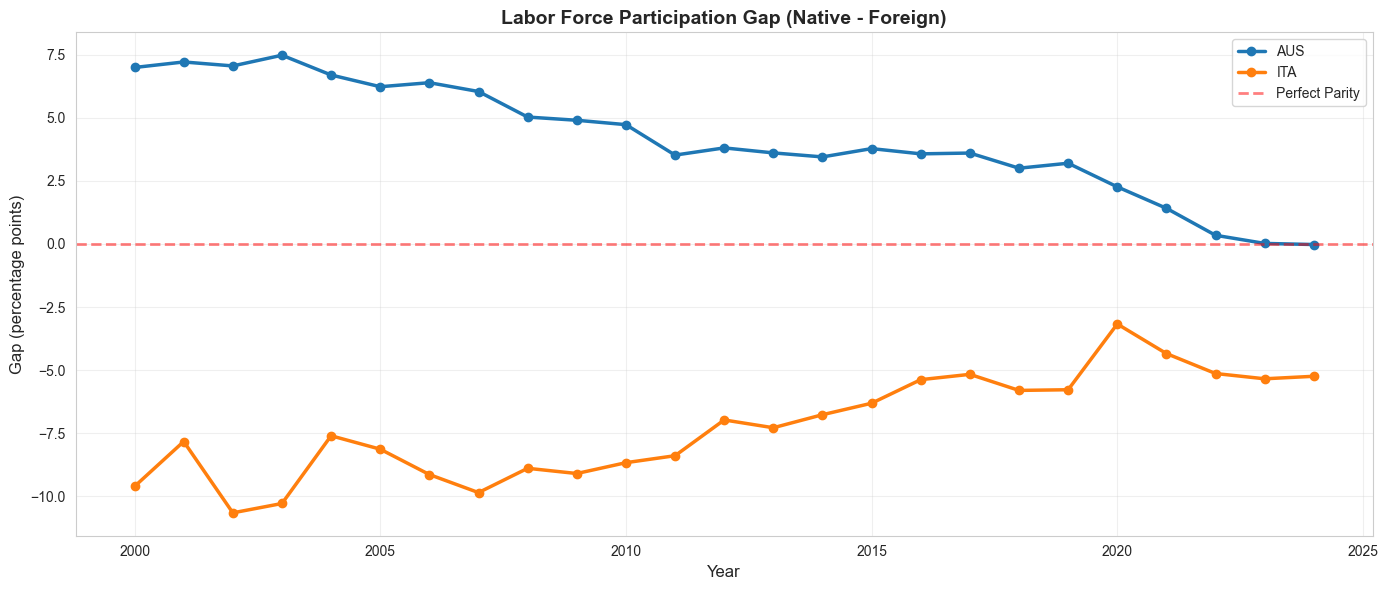

In [9]:
# ============================================================================
# CELL 9: Visualization 3 - LFP Gap Trends
# ============================================================================

plot_lfp_gap_trends(gaps_filtered, countries=selected_countries)

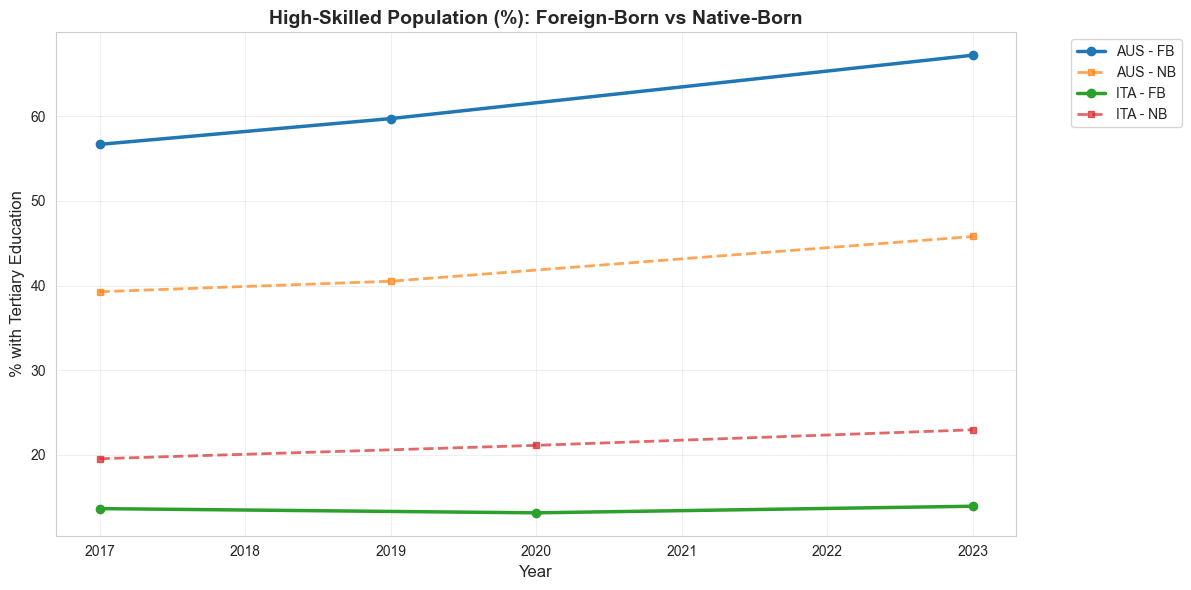

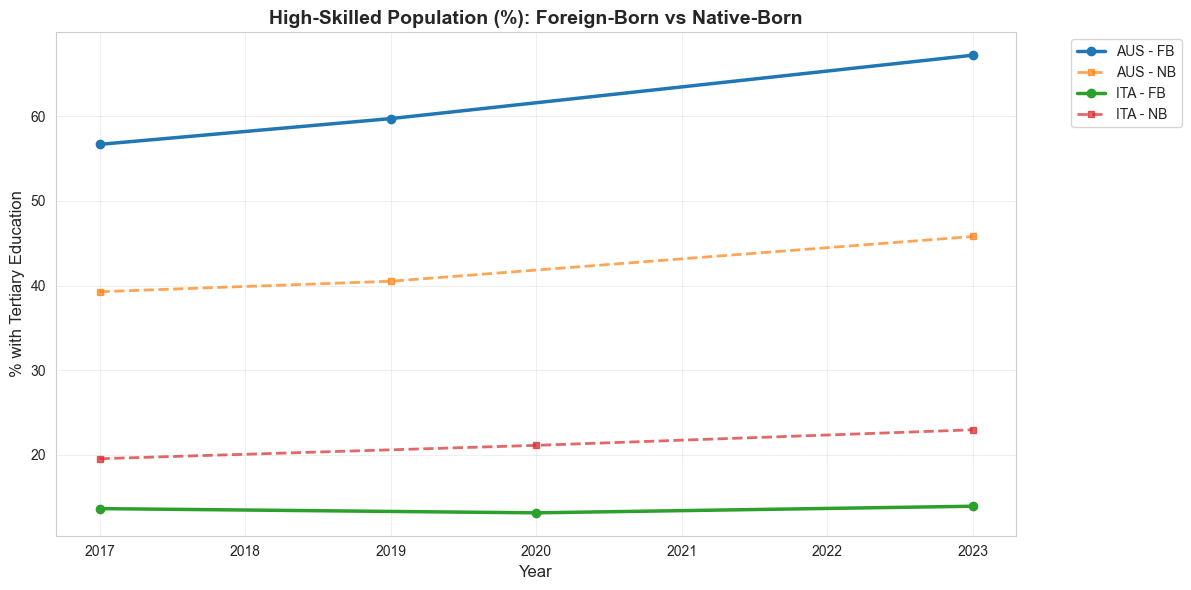

In [10]:
# ============================================================================
# CELL 10: Visualization 5 - High-Skilled Percentage Over Time
# ============================================================================

plot_highskill_comparison(skill_filtered, countries=selected_countries)